In [102]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random
from tensorflow.keras.layers import LSTM, Bidirectional
import numpy as np


In [2]:
# برای نظرات منفی:
os.listdir('C:/Users/Dobit/Desktop/comment_data/neg')

# برای نظرات مثبت:
os.listdir('C:/Users/Dobit/Desktop/comment_data/pos')


['cv000_29590.txt',
 'cv001_18431.txt',
 'cv002_15918.txt',
 'cv003_11664.txt',
 'cv004_11636.txt',
 'cv005_29443.txt',
 'cv006_15448.txt',
 'cv007_4968.txt',
 'cv008_29435.txt',
 'cv009_29592.txt',
 'cv010_29198.txt',
 'cv011_12166.txt',
 'cv012_29576.txt',
 'cv013_10159.txt',
 'cv014_13924.txt',
 'cv015_29439.txt',
 'cv016_4659.txt',
 'cv017_22464.txt',
 'cv018_20137.txt',
 'cv019_14482.txt',
 'cv020_8825.txt',
 'cv021_15838.txt',
 'cv022_12864.txt',
 'cv023_12672.txt',
 'cv024_6778.txt',
 'cv025_3108.txt',
 'cv026_29325.txt',
 'cv027_25219.txt',
 'cv028_26746.txt',
 'cv029_18643.txt',
 'cv030_21593.txt',
 'cv031_18452.txt',
 'cv032_22550.txt',
 'cv033_24444.txt',
 'cv034_29647.txt',
 'cv035_3954.txt',
 'cv036_16831.txt',
 'cv037_18510.txt',
 'cv038_9749.txt',
 'cv039_6170.txt',
 'cv040_8276.txt',
 'cv041_21113.txt',
 'cv042_10982.txt',
 'cv043_15013.txt',
 'cv044_16969.txt',
 'cv045_23923.txt',
 'cv046_10188.txt',
 'cv047_1754.txt',
 'cv048_16828.txt',
 'cv049_20471.txt',
 'cv050_11

In [5]:
stop_words = stopwords.words('english')

In [7]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('Desktop/comment_data/neg'):
    with open('Desktop/comment_data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [98]:
max_len_negative

1400

In [9]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('Desktop/comment_data/pos'):
    with open('Desktop/comment_data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [100]:
max_len_positive

1693

In [11]:
max_len = max(max_len_negative, max_len_positive)

In [13]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [26]:
X_train = negative_documents[: 800] + positive_documents[:800]

In [28]:
len(X_train)

1600

In [30]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]

In [32]:
len(y_train)

1600

In [34]:
X_test = negative_documents[800: ] + positive_documents[800:]
len(X_test)

400

In [36]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing. sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow. keras.models import Model
from tensorflow.keras. layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras. layers import concatenate

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [48]:
import pickle
with open('tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)

In [50]:
tokenizer

In [52]:
vocab_len = len(tokenizer.word_index) + 1

In [54]:
vocab_len

40484

In [56]:
encoded = tokenizer.texts_to_sequences(X_train)

In [58]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [60]:
padded. shape

(1600, 1693)

In [62]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_len,))
embedding2 = Embedding(vocab_len, 100)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
poo12 = MaxPool1D(pool_size=2)(drop2)
flat2= Flatten()(poo12)

input3 = Input(shape=(max_len,))
embedding3 = Embedding(vocab_len, 100)(input3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu') (embedding3)
drop3 = Dropout(0.5)(conv3)
poo13 = MaxPool1D(pool_size=2)(drop3)
flat3 = Flatten()(poo13)

input4 = Input(shape=(max_len,))
embedding4 = Embedding(vocab_len, 100)(input4)
conv4 = Conv1D(filters=32, kernel_size=10, activation='relu') (embedding4)
drop4 = Dropout(0.5)(conv4)
poo14 = MaxPool1D(pool_size=2)(drop4)
flat4 = Flatten()(poo14)

conc = concatenate([flat1, flat2, flat3, flat4])

dense1 = Dense(10, activation='relu') (conc)
output = Dense(1, activation='sigmoid') (dense1)

In [64]:
model = Model(inputs=[input1, input2, input3, input4], outputs=output)

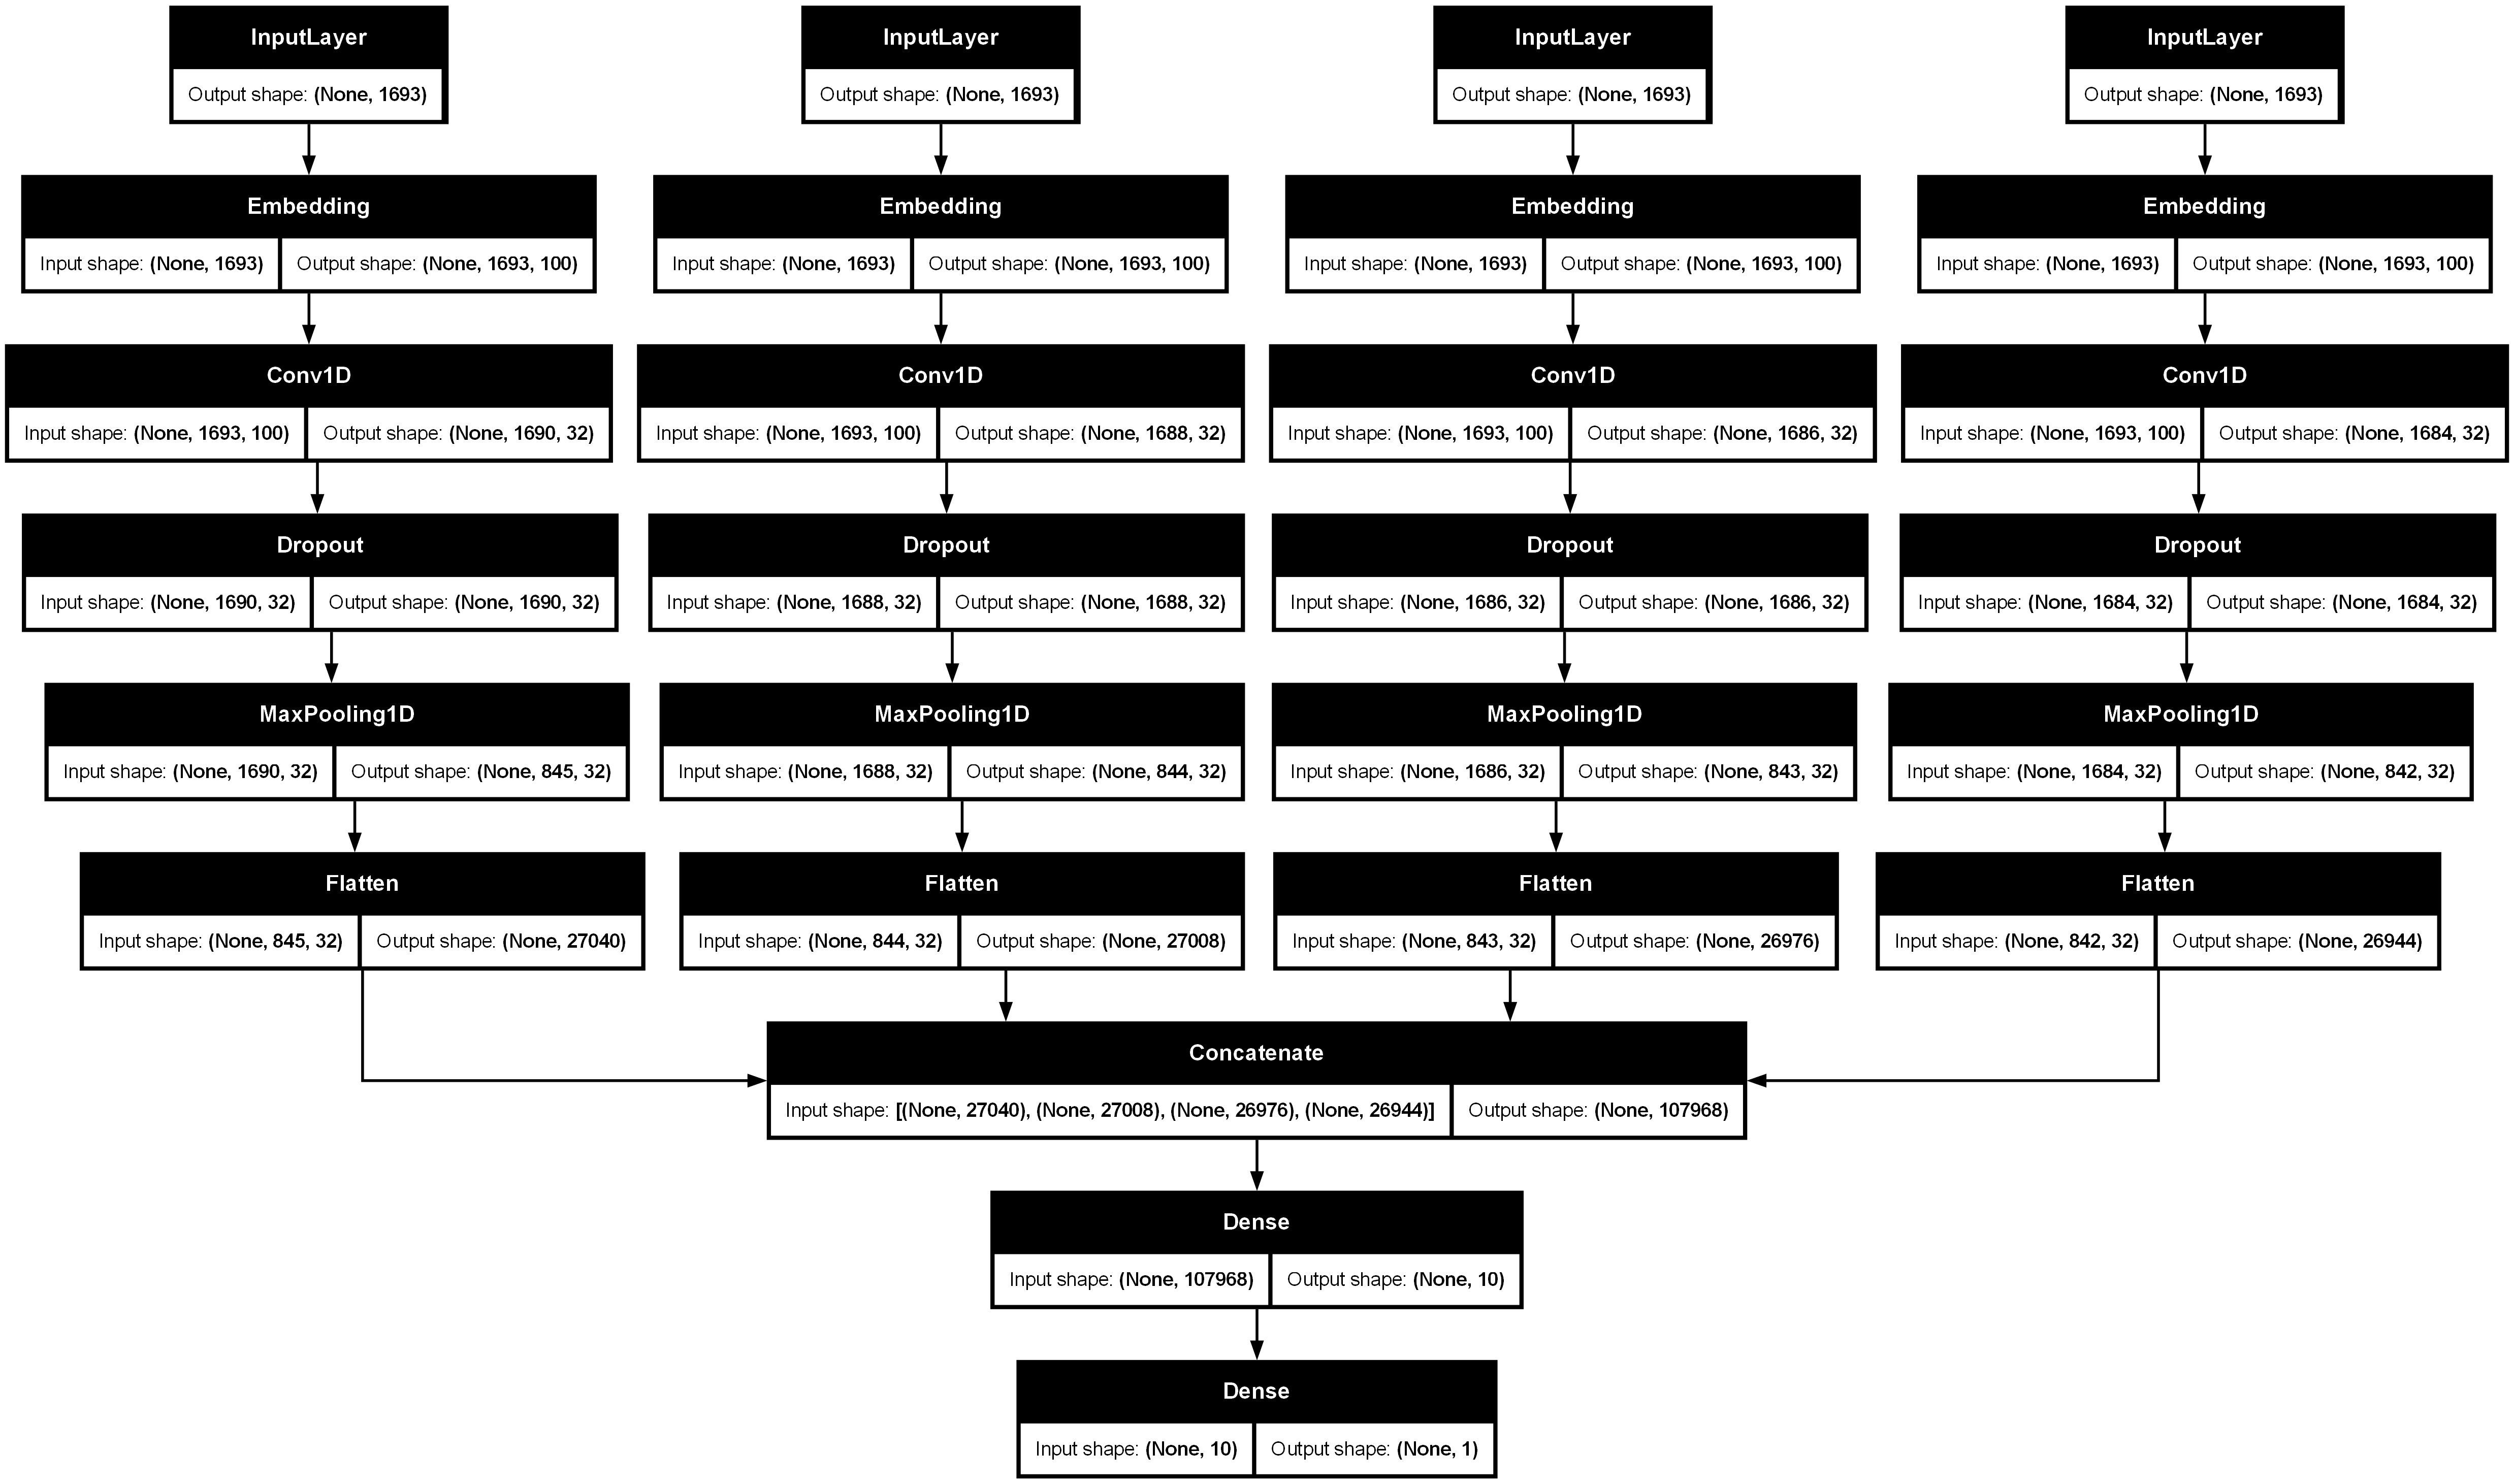

In [66]:
plot_model(model,show_shapes = True)

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 1693)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 1693)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_2 (InputLayer)    │ (None, 1693)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_3 (InputLayer)    │ (None, 1693)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 1693, 100)         │       4,048,400 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 1693, 100)         │       4,048,400 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_2 (Embedding)       │ (None, 1693, 100)         │       4,048,400 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_3 (Embedding)       │ (None, 1693, 100)         │       4,048,400 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d (Conv1D)               │ (None, 1690, 32)          │          12,832 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_1 (Conv1D)             │ (None, 1688, 32)          │          19,232 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_2 (Conv1D)             │ (None, 1686, 32)          │          25,632 │ embedding_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_3 (Conv1D)             │ (None, 1684, 32)          │          32,032 │ embedding_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 1690, 32)          │               0 │ conv1d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 1688, 32)          │               0 │ conv1d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 1686, 32)          │               0 │ conv1d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 1684, 32)          │               0 │ conv1d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d (MaxPooling1D)  │ (None, 845, 32)           │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 17,363,029 (66.23 MB)

 Trainable params: 17,363,029 (66.23 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
new_text = """
The latest blockbuster film from the acclaimed director was an utter disappointment.
From the opening scene, it was clear that the plot was convoluted, the characters were one-dimensional, and the overall execution was sloppy.
The lead actor, who is normally quite talented, delivered a painfully wooden performance, seemingly sleepwalking through his lines with zero charisma or emotional depth.
His co-stars fared no better, with their characters feeling like hollow caricatures rather than believable human beings.
The film's central premise, which had so much potential, was squandered by a wandering, disjointed narrative that failed to build any real momentum or tension.
Important plot points were rushed through hastily, while extraneous tangents and pointless subplots dragged the pacing to a crawl.
It felt as though the screenwriter had a checklist of genre tropes they needed to hit, rather than a coherent, compelling story to tell.
The film's visual style was equally underwhelming. The cinematography was bland and uninspired, with flat lighting and uninventive framing that did little to elevate the material.
The special effects, which should have been a highlight, were surprisingly subpar, with obvious CGI backdrops and unconvincing creature designs that took the viewer out of the experience.
Perhaps the most egregious failing of this film, however, was its complete lack of originality.
It felt like a pale imitation of far superior works in the same genre, borrowing heavily from established franchises and regurgitating tired clichés without any real creative spark.
Instead of bringing a fresh perspective or innovative approach to the table, the filmmakers simply played it safe, relying on cheap nostalgia and empty spectacle to distract from the hollowness at the core of the project.
By the time the credits rolled, I was left with a profound sense of disappointment and wasted potential.
This film had all the ingredients to be a thrilling, engaging cinematic experience, but it ultimately fell flat due to its uninspired execution and lack of creative vision.
It's a shame, really, because with a little more care and attention to detail, this could have been a truly memorable addition to the genre.
Instead, it's just another forgettable, cookie-cutter blockbuster that will likely be forgotten as quickly as it was released.
In the end, this film is a prime example of style over substance, a hollow shell of a movie that prioritizes flashy visual effects and star power over genuine storytelling and character development.
It's a waste of the audience's time and money, and I can't in good conscience recommend it to anyone who values quality filmmaking.
Save your money and skip this one – there are far better options out there that are worthy of your attention.
"""

In [104]:
encoded_test = tokenizer. texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [106]:
padded_test.shape

(400, 1693)

In [108]:
model.fit([padded,padded,padded,padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test,padded_test,padded_test,padded_test], np.array(y_test)))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 349ms/step - accuracy: 0.7908 - loss: 0.5183 - val_accuracy: 0.6725 - val_loss: 0.6142
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - accuracy: 0.8556 - loss: 0.4335 - val_accuracy: 0.8000 - val_loss: 0.5257
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 358ms/step - accuracy: 0.9508 - loss: 0.3401 - val_accuracy: 0.8125 - val_loss: 0.5005
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 373ms/step - accuracy: 0.9656 - loss: 0.2923 - val_accuracy: 0.8250 - val_loss: 0.4784
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 408ms/step - accuracy: 0.9739 - loss: 0.2710 - val_accuracy: 0.8225 - val_loss: 0.4663
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 415ms/step - accuracy: 0.9841 - loss: 0.2532 - val_accuracy: 0.8150 - val_loss: 0.4570
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 390ms/step - accuracy: 0.9817 - loss: 0.2467 - val_accuracy: 0.8050 - val_loss: 0.4620
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 396ms/step - accuracy: 0.9821 - loss: 0.2282 - val_accu

In [110]:
model.save('textcnn.h5')

In [112]:
from tensorflow.keras.models import load_model

In [114]:
model = load_model('textcnn.h5')

In [116]:
with open('tokenizer.h5','rb') as f:
    tokenizer = pickle.load(f)

In [118]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'one': 3,
 'movie': 4,
 'like': 5,
 'even': 6,
 'time': 7,
 'would': 8,
 'good': 9,
 'story': 10,
 'much': 11,
 'character': 12,
 'also': 13,
 'get': 14,
 'characters': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'way': 19,
 'well': 20,
 'could': 21,
 'make': 22,
 'really': 23,
 'films': 24,
 'little': 25,
 'people': 26,
 'life': 27,
 'plot': 28,
 'scene': 29,
 'never': 30,
 'man': 31,
 'bad': 32,
 'best': 33,
 'new': 34,
 'scenes': 35,
 'many': 36,
 'movies': 37,
 'know': 38,
 'great': 39,
 'love': 40,
 'director': 41,
 'another': 42,
 'action': 43,
 'go': 44,
 'still': 45,
 'seems': 46,
 'made': 47,
 'something': 48,
 'us': 49,
 'end': 50,
 'back': 51,
 'world': 52,
 'however': 53,
 'work': 54,
 'makes': 55,
 'every': 56,
 'big': 57,
 'though': 58,
 'better': 59,
 'enough': 60,
 'audience': 61,
 'around': 62,
 'seen': 63,
 'performance': 64,
 'gets': 65,
 'take': 66,
 'may': 67,
 'role': 68,
 'real': 69,
 'funny': 70,
 'going': 71,
 'think': 72,
 'years': 73,
 '

In [120]:
encoded_txt = tokenizer. texts_to_sequences([txt])
padded_txt = pad_sequences(encoded_txt, maxlen=max_len, padding='post')

In [122]:
padded_txt.shape

(1, 1693)

In [124]:
model.predict([padded_txt, padded_txt, padded_txt, padded_txt]) [0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


0.2988169

In [138]:
if (model.predict([padded_txt, padded_txt, padded_txt, padded_txt])[0][0] < 0.5):
    print('negative')
else:
    print('positive')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
negative


In [160]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from nltk.tokenize import word_tokenize
from string import punctuation

def neg_or_pos(txt):
    # Tokenize the input text
    tokens = word_tokenize(txt)
    
    # Remove punctuation from each token
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    
    # Join tokens back to a string
    txt = ' '.join(tokens)
    
    # Convert text to sequences
    encoded_txt = tokenizer.texts_to_sequences([txt])
    
    # Pad the sequences
    padded_txt = pad_sequences(encoded_txt, maxlen=max_len, padding='post')
    
    # Create 4 inputs for the model
    input_1 = padded_txt
    input_2 = padded_txt
    input_3 = padded_txt
    input_4 = padded_txt
    
    # Predict the sentiment with 4 inputs
    pred = model.predict([input_1, input_2, input_3, input_4])[0][0]
    
    # Calculate the probability
    probability = float(pred)
    
    # Determine the result
    if probability > 0.5:
        result = 'Positive'
    else:
        result = 'Negative'
    
    # Print the result, confidence, and error
    print(f"Result: {result}")
    print(f"Confidence: {probability * 100:.2f}%")
    print(f"Error: {100 - (probability * 100):.2f}%")


In [176]:
neg_or_pos(new_txt1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Result: Positive
Confidence: 63.18%
Error: 36.82%


In [174]:
new_txt1 = """ I recently purchased the SmartAir Pro air purifier, and my experience has been somewhat mixed. On the positive side, the product has a sleek and modern design that fits well with my home decor. It’s also fairly compact, so it doesn’t take up much space, which is a big plus for me. The setup was straightforward, and within minutes, the purifier was running. The air quality indicator is a nice touch, giving real-time feedback on the air around me, which reassures me that it's doing something.

However, despite these positive aspects, there are several issues that I’ve encountered. First, the noise level is much higher than I expected, especially when the device is set to its higher settings. I was hoping for something quieter, as advertised, but it’s distracting, particularly at night. I’ve had to turn it off completely while sleeping, which defeats the purpose of having an air purifier running 24/7.

Another major drawback is the limited coverage area. My living room isn’t particularly large, but the purifier struggles to maintain clean air throughout the space. After a few hours of use, the air quality indicator barely shows any improvement, which makes me question the overall effectiveness of the device. For the price I paid, I was expecting far better performance.

Moreover, the filter replacements are costly and need to be changed more frequently than I anticipated. The manual suggests replacing the filter every three months, but after only a month, the indicator is already signaling that a new filter is needed. This is an unexpected and ongoing expense that wasn’t clear during the initial purchase.

Customer support also leaves something to be desired. I tried reaching out to ask about the high noise levels and filter lifespan, but the response I received was generic and didn’t address my concerns in detail. I was hoping for better post-purchase service, especially considering the price point of this product.

In summary, while the SmartAir Pro looks great and offers some useful features like the air quality indicator, the overall performance is underwhelming. The noise, limited coverage, and ongoing costs for filters make it hard to recommend wholeheartedly. There are definitely better options out there if you’re looking for something quieter and more efficient. It’s not a terrible product, but it certainly didn’t live up to my expectations.

"""